In [ ]:
# !pip install arch

In [ ]:
# !pip3 install yfinance

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf

from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from decimal import Decimal

In [ ]:
from google.colab import drive
import pandas as pd

# This will prompt for authorization.
drive.mount('/content/drive')

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
data_path = "/content/drive/My Drive/ColabNotebooks/Capstone/EURUSD1W_Dow_Gold.csv"
df = pd.read_csv(data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Let's take a look at the first few rows of the DataFrame
df.head()

,Date,Dow_Jones_Change %,Dow_Jones_High,Dow_Jones_Low,Dow_Jones_Open,Dow_Jones_Price,Dow_Jones_Vol.,EURUSDH1W,EURUSDV1W,Gold_Change %,Gold_High,Gold_Low,Gold_Open,Gold_Price,Gold_Vol.,Unnamed: 0
0,2014/4/1,0.46%,"16,565.73","16,457.60","16,458.05","16,532.61",88.01M,3.6013,7.5625,-0.30%,"1,288.40","1,277.40","1,284.60","1,280.00",112.92K,T
1,2014/4/2,0.24%,"16,588.19","16,506.60","16,532.80","16,573.00",78.12M,2.9209,7.8425,0.84%,"1,294.90","1,278.90","1,279.60","1,290.80",124.47K,W
2,2014/4/3,0.00%,"16,604.15","16,527.60","16,572.36","16,572.55",77.22M,3.2631,7.0525,-0.48%,"1,294.20","1,281.90","1,290.40","1,284.60",98.67K,T
3,2014/4/4,-0.96%,"16,631.63","16,392.77","16,576.02","16,412.71",104.35M,3.3158,5.6325,1.47%,"1,307.50","1,284.40","1,286.60","1,303.50",145.50K,F
4,2014/4/7,-1.02%,"16,421.38","16,244.01","16,414.15","16,245.87",116.54M,3.6853,5.1150,-0.40%,"1,304.80","1,295.80","1,304.00","1,298.30",80.28K,M


In [ ]:
# # Fill missing values (if any)
# df = df.fillna(method='ffill')

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2359 non-null   datetime64[ns]
 1   Dow_Jones_Change %  2272 non-null   object        
 2   Dow_Jones_High      2272 non-null   object        
 3   Dow_Jones_Low       2272 non-null   object        
 4   Dow_Jones_Open      2272 non-null   object        
 5   Dow_Jones_Price     2272 non-null   object        
 6   Dow_Jones_Vol.      2272 non-null   object        
 7   EURUSDH1W           2354 non-null   float64       
 8   EURUSDV1W           2354 non-null   float64       
 9   Gold_Change %       2335 non-null   object        
 10  Gold_High           2335 non-null   object        
 11  Gold_Low            2335 non-null   object        
 12  Gold_Open           2335 non-null   object        
 13  Gold_Price          2335 non-null   object      

In [ ]:
# Drop the 'Unnamed' column
df = df.drop(['Unnamed: 0'], axis=1)


In [ ]:
df.head()

,Date,Dow_Jones_Change %,Dow_Jones_High,Dow_Jones_Low,Dow_Jones_Open,Dow_Jones_Price,Dow_Jones_Vol.,EURUSDH1W,EURUSDV1W,Gold_Change %,Gold_High,Gold_Low,Gold_Open,Gold_Price,Gold_Vol.
0,2014-04-01,0.46%,"16,565.73","16,457.60","16,458.05","16,532.61",88.01M,3.6013,7.5625,-0.30%,"1,288.40","1,277.40","1,284.60","1,280.00",112.92K
1,2014-04-02,0.24%,"16,588.19","16,506.60","16,532.80","16,573.00",78.12M,2.9209,7.8425,0.84%,"1,294.90","1,278.90","1,279.60","1,290.80",124.47K
2,2014-04-03,0.00%,"16,604.15","16,527.60","16,572.36","16,572.55",77.22M,3.2631,7.0525,-0.48%,"1,294.20","1,281.90","1,290.40","1,284.60",98.67K
3,2014-04-04,-0.96%,"16,631.63","16,392.77","16,576.02","16,412.71",104.35M,3.3158,5.6325,1.47%,"1,307.50","1,284.40","1,286.60","1,303.50",145.50K
4,2014-04-07,-1.02%,"16,421.38","16,244.01","16,414.15","16,245.87",116.54M,3.6853,5.1150,-0.40%,"1,304.80","1,295.80","1,304.00","1,298.30",80.28K


In [ ]:
# Drop rows where 'Dow_Jones_Change %' is missing
df = df.dropna(subset=['Dow_Jones_Change %'])

In [ ]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2272 entries, 0 to 2358
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2272 non-null   datetime64[ns]
 1   Dow_Jones_Change %  2272 non-null   object        
 2   Dow_Jones_High      2272 non-null   object        
 3   Dow_Jones_Low       2272 non-null   object        
 4   Dow_Jones_Open      2272 non-null   object        
 5   Dow_Jones_Price     2272 non-null   object        
 6   Dow_Jones_Vol.      2272 non-null   object        
 7   EURUSDH1W           2271 non-null   float64       
 8   EURUSDV1W           2271 non-null   float64       
 9   Gold_Change %       2272 non-null   object        
 10  Gold_High           2272 non-null   object        
 11  Gold_Low            2272 non-null   object        
 12  Gold_Open           2272 non-null   object        
 13  Gold_Price          2272 non-null   object      

In [ ]:
# Drop rows where 'EURUSDH1W' is missing
df = df.dropna(subset=['EURUSDH1W'])

In [ ]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2271 non-null   datetime64[ns]
 1   Dow_Jones_Change %  2271 non-null   object        
 2   Dow_Jones_High      2271 non-null   object        
 3   Dow_Jones_Low       2271 non-null   object        
 4   Dow_Jones_Open      2271 non-null   object        
 5   Dow_Jones_Price     2271 non-null   object        
 6   Dow_Jones_Vol.      2271 non-null   object        
 7   EURUSDH1W           2271 non-null   float64       
 8   EURUSDV1W           2271 non-null   float64       
 9   Gold_Change %       2271 non-null   object        
 10  Gold_High           2271 non-null   object        
 11  Gold_Low            2271 non-null   object        
 12  Gold_Open           2271 non-null   object        
 13  Gold_Price          2271 non-null   object      

In [ ]:
# Remove the '%' character and convert to 'float64'
df['Dow_Jones_Change %'] = df['Dow_Jones_Change %'].str.replace('%', '').astype('float64')

In [ ]:
# Remove the 'K' character and convert to 'float64'
df['Gold_Vol.'] = df['Gold_Vol.'].str.replace('K', '').astype('float64')

In [ ]:
# Replace '%' and ',' characters with ''
df = df.replace({'%': '', ',': '', 'M': ''}, regex=True)

In [ ]:
df.head()

,Date,Dow_Jones_Change %,Dow_Jones_High,Dow_Jones_Low,Dow_Jones_Open,Dow_Jones_Price,Dow_Jones_Vol.,EURUSDH1W,EURUSDV1W,Gold_Change %,Gold_High,Gold_Low,Gold_Open,Gold_Price,Gold_Vol.
0,2014-04-01,0.46,16565.73,16457.60,16458.05,16532.61,88.01,3.6013,7.5625,-0.30,1288.40,1277.40,1284.60,1280.00,112.92
1,2014-04-02,0.24,16588.19,16506.60,16532.80,16573.00,78.12,2.9209,7.8425,0.84,1294.90,1278.90,1279.60,1290.80,124.47
2,2014-04-03,0.00,16604.15,16527.60,16572.36,16572.55,77.22,3.2631,7.0525,-0.48,1294.20,1281.90,1290.40,1284.60,98.67
3,2014-04-04,-0.96,16631.63,16392.77,16576.02,16412.71,104.35,3.3158,5.6325,1.47,1307.50,1284.40,1286.60,1303.50,145.50
4,2014-04-07,-1.02,16421.38,16244.01,16414.15,16245.87,116.54,3.6853,5.1150,-0.40,1304.80,1295.80,1304.00,1298.30,80.28


In [ ]:
# Identify all columns of type 'object'
object_cols = df.select_dtypes(include='object').columns
# Convert all 'object' columns to 'float64'
for col in object_cols:
    df[col] = df[col].astype('float64')

In [ ]:
df.head()

,Date,Dow_Jones_Change %,Dow_Jones_High,Dow_Jones_Low,Dow_Jones_Open,Dow_Jones_Price,Dow_Jones_Vol.,EURUSDH1W,EURUSDV1W,Gold_Change %,Gold_High,Gold_Low,Gold_Open,Gold_Price,Gold_Vol.
0,2014-04-01,0.46,16565.73,16457.60,16458.05,16532.61,88.01,3.6013,7.5625,-0.30,1288.4,1277.4,1284.6,1280.0,112.92
1,2014-04-02,0.24,16588.19,16506.60,16532.80,16573.00,78.12,2.9209,7.8425,0.84,1294.9,1278.9,1279.6,1290.8,124.47
2,2014-04-03,0.00,16604.15,16527.60,16572.36,16572.55,77.22,3.2631,7.0525,-0.48,1294.2,1281.9,1290.4,1284.6,98.67
3,2014-04-04,-0.96,16631.63,16392.77,16576.02,16412.71,104.35,3.3158,5.6325,1.47,1307.5,1284.4,1286.6,1303.5,145.50
4,2014-04-07,-1.02,16421.38,16244.01,16414.15,16245.87,116.54,3.6853,5.1150,-0.40,1304.8,1295.8,1304.0,1298.3,80.28


In [ ]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2271 non-null   datetime64[ns]
 1   Dow_Jones_Change %  2271 non-null   float64       
 2   Dow_Jones_High      2271 non-null   float64       
 3   Dow_Jones_Low       2271 non-null   float64       
 4   Dow_Jones_Open      2271 non-null   float64       
 5   Dow_Jones_Price     2271 non-null   float64       
 6   Dow_Jones_Vol.      2271 non-null   float64       
 7   EURUSDH1W           2271 non-null   float64       
 8   EURUSDV1W           2271 non-null   float64       
 9   Gold_Change %       2271 non-null   float64       
 10  Gold_High           2271 non-null   float64       
 11  Gold_Low            2271 non-null   float64       
 12  Gold_Open           2271 non-null   float64       
 13  Gold_Price          2271 non-null   float64     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam


In [ ]:
df1=df.drop(['Date'], axis=1)

In [ ]:
# Normalize the dataset
scalers = {}
for i in df1.columns:
    scaler = MinMaxScaler(feature_range=(0, 1))
    s_s = scaler.fit_transform(df1[i].values.reshape(-1,1))
    s_s = np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    df1[i] = s_s


In [ ]:
# Split into train and test sets
train_size = int(len(df1) * 0.8)
test_size = len(df1) - train_size
train, test = df1.iloc[0:train_size], df1.iloc[train_size:]

In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)].values
        X.append(a)
        Y.append(dataset.iloc[i + look_back]['EURUSDH1W'])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], look_back, X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, X_test.shape[2]))



In [ ]:

def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays
    that can be used as metrics for NN during training
    '''
    loss = K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

    return loss

In [ ]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam())
history=model.fit(X_train, Y_train, epochs=150, batch_size=64, validation_data=(X_test, Y_test))

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions of EURUSDH1W back to normal values
# train_predict = scalers['scaler_EURUSDH1W'].inverse_transform(train_predict)
# Y_train = scalers['scaler_EURUSDH1W'].inverse_transform(Y_train.reshape(-1,1))
# test_predict = scalers['scaler_EURUSDH1W'].inverse_transform(test_predict)
# Y_test = scalers['scaler_EURUSDH1W'].inverse_transform(Y_test.reshape(-1,1))

# You can now compare your train_predict, Y_train, test_predict, Y_test values

Epoch 1/150
28/28 [==============================] - 3s 22ms/step - loss: 0.0135 - val_loss: 0.0147
Epoch 2/150
28/28 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 3/150
28/28 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0104
Epoch 4/150
28/28 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 0.0087
Epoch 5/150
28/28 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0074
Epoch 6/150
28/28 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0063
Epoch 7/150
28/28 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 8/150
28/28 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 9/150
28/28 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 10/150
28/28 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 11

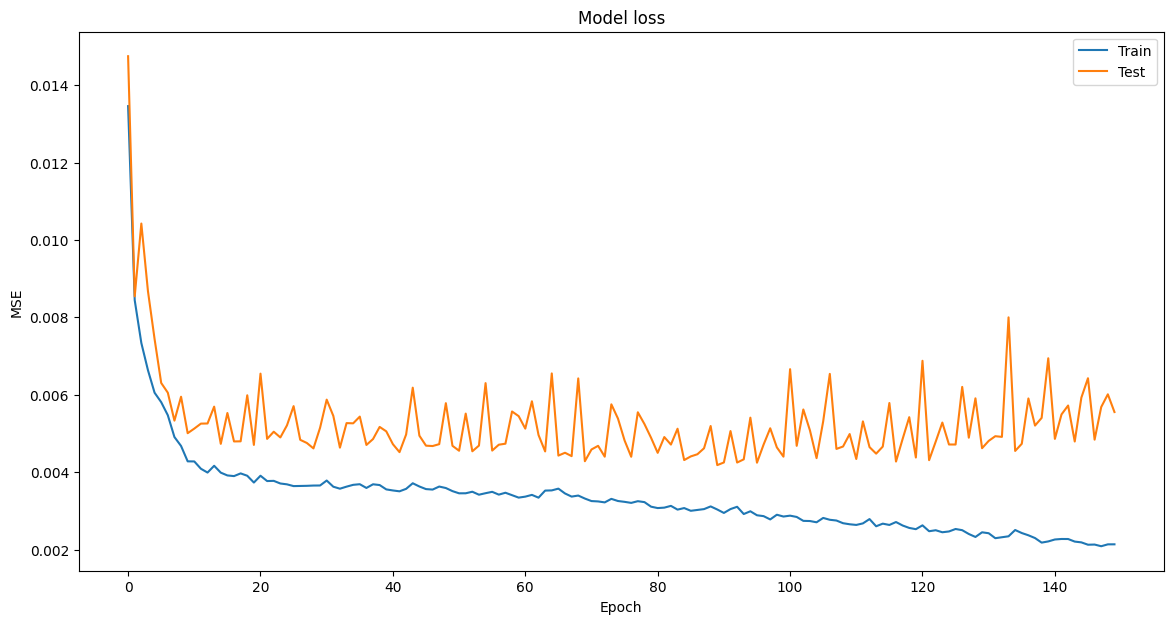

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

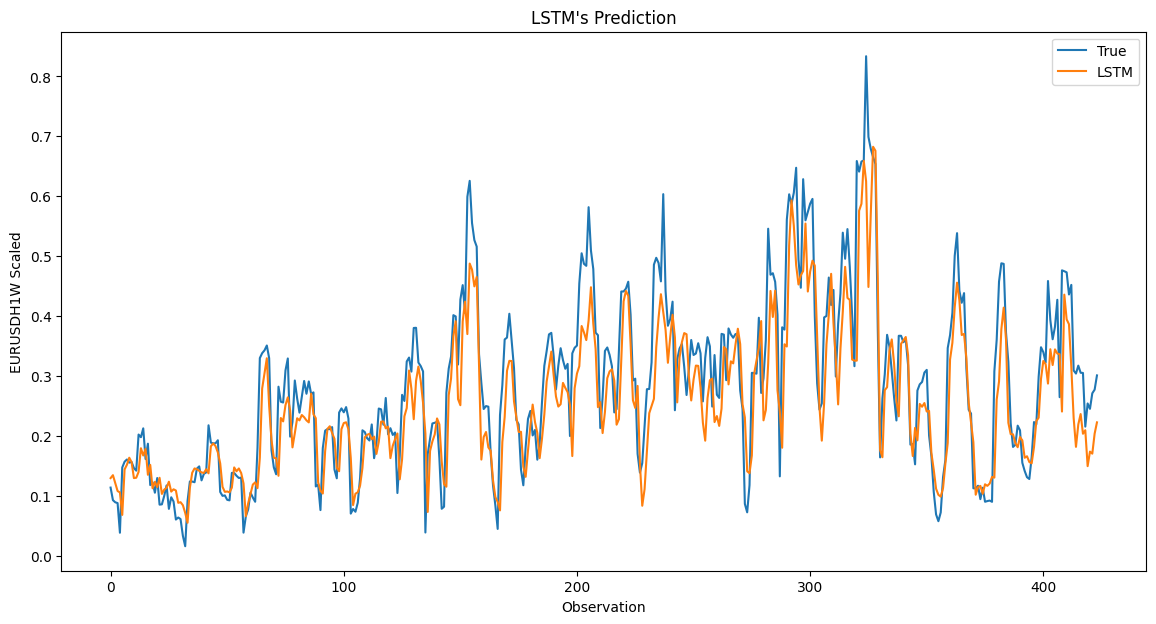

In [ ]:
# Plotting true values and LSTM model predictions
plt.figure(figsize=(14,7))
plt.plot(Y_test, label='True')
plt.plot(test_predict, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('EURUSDH1W Scaled')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics for training set
train_mae = mean_absolute_error(Y_train, train_predict)
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))

print(f'Training MAE: {train_mae}')
print(f'Training RMSE: {train_rmse}')

# Calculate metrics for test set
test_mae = mean_absolute_error(Y_test, test_predict)
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))

print(f'Test MAE: {test_mae}')
print(f'Test RMSE: {test_rmse}')

Training MAE: 0.03159756119732886
Training RMSE: 0.04372422124433043
Test MAE: 0.055336778228825975
Test RMSE: 0.07452971844148697


In [ ]:
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Squared Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)))) * 100
    return loss


In [ ]:
# # INITIATE SCALER
# scaler_vol = MinMaxScaler()

# # FIT SCALER TO CURRENT VOLATILITY IN TRAINING SET
# scaler_vol = scaler_vol.fit(X_train.values.reshape(-1,1))

AttributeError: ignored

In [ ]:
# Calculate metrics for training set
train_rmspe = rmspe(Y_train, train_predict)

print(f'Training RMSPE: {train_rmspe}')

# Calculate metrics for test set
test_rmspe = rmspe(Y_test, test_predict)

print(f'Test RMSPE: {test_rmspe}')


Training RMSPE: 152.58770689626547
Test RMSPE: 145.5206195888346


In [ ]:
def RMSPE(y_true, y_pred):
    """
    Compute Root Mean Squared Percentage Error between 2 arrays
    """
    output = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return output

In [ ]:
# Calculate metrics for training set
train_RMSPE = RMSPE(Y_train, train_predict)

print(f'Training RMSPE: {train_rmspe}')

# Calculate metrics for test set
test_RMSPE = RMSPE(Y_test, test_predict)

print(f'Test RMSPE: {test_rmspe}')


Training RMSPE: 152.58770689626547
Test RMSPE: 145.5206195888346
